# COVID 19 Deaths Analysis

In This project, I analyze and go over the trends that is happening in the Covid 19 dataset from "Our World in Data COVID-19".

## Goals:
- Figure out the total COVID cases overtime.
- Comparision between COVID cases and vaccinations.
- See trends of COVID cases in different continents.
- Find out the countries with the most COVID cases.

## Contents:
#### 1. Loading and Exploring the Dataset
#### 2. Cleaning the data
#### 3. Visualization of data
#### 4. Conclusion

### 1. Loading and Exploring the Dataset

In [54]:
#Importing the necessary modules for data analyis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [55]:
#Loading the csv file
#parse_dates to convert the date column to date datetime objects
covid = pd.read_csv("owid-covid-data.csv",parse_dates=['date'])

#Checking the first 5 rows
covid.head(5) 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [56]:
# Checking the count of the columns and rows
covid.shape

(429435, 67)

In [57]:
# Checking all the columns
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [58]:
# Getting only the columns that are needed for our data analysis
covid_subset = covid[[
       'location', 'date', 'total_cases', 'new_cases',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths', 'new_deaths', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_vaccinations',
       'people_vaccinated','total_vaccinations_per_hundred',
       'iso_code', 'continent','population'
]]

In [59]:
# Checking missing values count
covid_subset.isna().sum()

location                               0
date                                   0
total_cases                        17631
new_cases                          19276
total_cases_per_million            17631
new_cases_per_million              19276
total_deaths                       17631
new_deaths                         18827
total_deaths_per_million           17631
new_deaths_per_million             18827
total_vaccinations                344018
people_vaccinated                 348303
total_vaccinations_per_hundred    344018
iso_code                               0
continent                          26525
population                             0
dtype: int64

We know now that there are missing values in the dataset.

In [60]:
#Checking the datatypes of the columns
covid_subset.dtypes

location                                  object
date                              datetime64[ns]
total_cases                              float64
new_cases                                float64
total_cases_per_million                  float64
new_cases_per_million                    float64
total_deaths                             float64
new_deaths                               float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
total_vaccinations                       float64
people_vaccinated                        float64
total_vaccinations_per_hundred           float64
iso_code                                  object
continent                                 object
population                                 int64
dtype: object

In [61]:
# Checking the descriptive statistics as there are many numerical values
covid_subset.describe()

,date,total_cases,new_cases,total_cases_per_million,new_cases_per_million,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,population
count,429435,4.118040e+05,4.101590e+05,411804.000000,410159.000000,4.118040e+05,410608.000000,411804.000000,410608.000000,8.541700e+04,8.113200e+04,85417.000000,4.294350e+05
mean,2022-04-21 01:06:25.463691008,7.365292e+06,8.017360e+03,112096.199420,122.357073,8.125957e+04,71.852139,835.514337,0.762321,5.616980e+08,2.487064e+08,124.279558,1.520336e+08
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.700000e+01
25%,2021-03-05 00:00:00,6.280750e+03,0.000000e+00,1916.100000,0.000000,4.300000e+01,0.000000,24.570000,0.000000,1.970788e+06,1.050009e+06,44.770000,5.237980e+05
50%,2022-04-20 00:00:00,6.365300e+04,0.000000e+00,29145.480000,0.000000,7.990000e+02,0.000000,295.090000,0.000000,1.439435e+07,6.901088e+06,130.550000,6.336393e+06
75%,2023-06-08 00:00:00,7.582720e+05,0.000000e+00,156770.190000,0.000000,9.574000e+03,0.000000,1283.820000,0.000000,1.161972e+08,5.093295e+07,194.990000,3.296952e+07
max,2024-08-14 00:00:00,7.758668e+08,4.423623e+07,763598.600000,241758.230000,7.057132e+06,103719.000000,6601.110000,893.660000,1.357877e+10,5.631264e+09,410.230000,7.975105e+09
std,NaN,4.477582e+07,2.296649e+05,162240.412405,1508.778585,4.411901e+05,1368.322990,1134.932641,6.982532,1.842160e+09,8.006461e+08,85.098042,6.975408e+08


In [62]:
# Asia listed as country even though it is not
covid_subset.sort_values(by = 'population', ascending = False)

,location,date,total_cases,new_cases,total_cases_per_million,new_cases_per_million,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,iso_code,continent,population
423270,World,2021-06-29,180429029.0,0.0,22583.98,0.0,3970592.0,0.0,496.99,0.0,3.076257e+09,1.846377e+09,38.57,OWID_WRL,NaN,7975105024
423868,World,2023-02-17,754937907.0,0.0,94494.22,0.0,6861435.0,0.0,858.83,0.0,1.329715e+10,5.537790e+09,166.73,OWID_WRL,NaN,7975105024
423858,World,2023-02-07,753690548.0,0.0,94338.09,0.0,6851330.0,0.0,857.57,0.0,1.328473e+10,5.532859e+09,166.58,OWID_WRL,NaN,7975105024
423859,World,2023-02-08,753690548.0,0.0,94338.09,0.0,6851330.0,0.0,857.57,0.0,1.328666e+10,5.532985e+09,166.60,OWID_WRL,NaN,7975105024
423860,World,2023-02-09,753690548.0,0.0,94338.09,0.0,6851330.0,0.0,857.57,0.0,1.328789e+10,5.533054e+09,166.62,OWID_WRL,NaN,7975105024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304918,Pitcairn,2021-07-11,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,PCN,Oceania,47
304917,Pitcairn,2021-07-10,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,PCN,Oceania,47
304916,Pitcairn,2021-07-09,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,PCN,Oceania,47
304915,Pitcairn,2021-07-08,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,PCN,Oceania,47


In [63]:
# Checking what countries are there, and other continents hidden as well.
covid_subset["location"].value_counts()

location
High-income countries            3026
European Union (27)              3024
Upper-middle-income countries    3013
Lower-middle-income countries    2983
Low-income countries             2724
                                 ... 
Scotland                         1305
Wales                            1198
Macao                             795
Northern Cyprus                   691
Western Sahara                      1
Name: count, Length: 255, dtype: int64

In [64]:
# Continents listed as countries hava NAN values in the continent column
asia = covid_subset[covid_subset["location"] == "Asia"]
asia

,location,date,total_cases,new_cases,total_cases_per_million,new_cases_per_million,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,iso_code,continent,population
20092,Asia,2020-01-05,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,OWID_ASI,NaN,4721383370
20093,Asia,2020-01-06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,OWID_ASI,NaN,4721383370
20094,Asia,2020-01-07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,OWID_ASI,NaN,4721383370
20095,Asia,2020-01-08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,OWID_ASI,NaN,4721383370
20096,Asia,2020-01-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,OWID_ASI,NaN,4721383370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21771,Asia,2024-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.104305e+09,3.689439e+09,192.83,OWID_ASI,NaN,4721383370
21772,Asia,2024-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.104305e+09,3.689439e+09,192.83,OWID_ASI,NaN,4721383370
21773,Asia,2024-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.104305e+09,3.689439e+09,192.83,OWID_ASI,NaN,4721383370
21774,Asia,2024-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.104305e+09,3.689439e+09,192.83,OWID_ASI,NaN,4721383370


### 2. Cleaning the Data

In [65]:
# # Defining the end_date since the dataset is not fully complete towards the end.
end_date = '2024-04-01'

# # Filtering the DataFrame to keep only rows with dates less than or equal to the end date
covid_subset = covid_subset[covid_subset['date'] <= end_date]

In [66]:
# Checking for duplicate data
covid_subset.duplicated().sum()

0

In [67]:
covid_subset = covid_subset.drop_duplicates()

In [68]:
# Dealing with the continents listed as countries
invalid_countries = [
    'World', 'Asia', 'Europe', 'Africa', 'North America', 
    'South America', 'Oceania', 'European Union', 'International'
]

covid_subset = covid_subset[~covid_subset['location'].isin(invalid_countries)]
covid_subset = covid_subset[covid_subset['continent'].notna()]  # removing rows with no continent

In [69]:
# Checking the missing values left
covid_subset.isna().sum()

location                               0
date                                   0
total_cases                        11009
new_cases                          12153
total_cases_per_million            11009
new_cases_per_million              12153
total_deaths                       11009
new_deaths                         11830
total_deaths_per_million           11009
new_deaths_per_million             11830
total_vaccinations                304125
people_vaccinated                 308252
total_vaccinations_per_hundred    304125
iso_code                               0
continent                              0
population                             0
dtype: int64

In [70]:
# Using ffill for the missing values in cumulative columns because it assumes the most recent value as approximation.
cumulative_columns = [
    'total_cases', 'total_cases_per_million', 'total_deaths', 
    'total_deaths_per_million', 'total_vaccinations', 
    'people_vaccinated', 'total_vaccinations_per_hundred'
]

# Apply ffill to the cumulative columns according to the country so it does not mix up between the countries values
covid_subset[cumulative_columns] = (
    covid_subset.sort_values(['location', 'date']).groupby('location')[cumulative_columns].ffill()
)


In [71]:
# Using interpolate for the missing values in the daily update columns because it replaces the missing values by estimation from the other near data points.
daily_columns = [
    'new_cases', 'new_cases_per_million', 'new_deaths', 'new_deaths_per_million'
]

covid_subset[daily_columns] = covid_subset[daily_columns].interpolate(method='linear')

In [72]:
# Checking the missing values left
covid_subset.isna().sum()

location                               0
date                                   0
total_cases                         9601
new_cases                              0
total_cases_per_million             9601
new_cases_per_million                  0
total_deaths                        9601
new_deaths                             0
total_deaths_per_million            9601
new_deaths_per_million                 0
total_vaccinations                120701
people_vaccinated                 121457
total_vaccinations_per_hundred    120701
iso_code                               0
continent                              0
population                             0
dtype: int64

In [73]:
# Replacing the remaining values with 0 as they didn't have reference point in the first place for ffill
# Also for the vaccinations, the error is caused because recorded data is before the vaccination program began for all the countries
covid_subset[cumulative_columns] = covid_subset[cumulative_columns].fillna(0)
covid_subset[daily_columns] = covid_subset[daily_columns].fillna(0)

In [74]:
covid_subset = covid_subset.drop_duplicates()

In [75]:
# Checking the missing values left
covid_subset.isna().sum()

location                          0
date                              0
total_cases                       0
new_cases                         0
total_cases_per_million           0
new_cases_per_million             0
total_deaths                      0
new_deaths                        0
total_deaths_per_million          0
new_deaths_per_million            0
total_vaccinations                0
people_vaccinated                 0
total_vaccinations_per_hundred    0
iso_code                          0
continent                         0
population                        0
dtype: int64

No more missing values left.

In [76]:
# Checking some logical errors that could be in the dataset caused by ffills and other data inputting errors
# Checking whether total death exceeds total cases in a row
(covid_subset['total_deaths'] > covid_subset['total_cases']).any()  # should be False

True

In [77]:
# Checking whether total cases exceeds population in a row
(covid_subset['total_cases'] > covid_subset['population']).any()    # should be False

False

In [78]:
# Dealing with the error of total deaths exceeding total cases by removing those rows which have more deaths than cases.
covid_subset = covid_subset[covid_subset['total_deaths'] <= covid_subset['total_cases']]

In [79]:
# Checking the logical issue, we need it to be false for it to be correct
(covid_subset['total_deaths'] > covid_subset['total_cases']).any()

False

In [80]:
# Fixing the other columns that are intermingled with the total deaths, total cases and population.
covid_subset['total_cases_per_million'] = covid_subset['total_cases'] / covid_subset['population'] * 1e6
covid_subset['total_deaths_per_million'] = covid_subset['total_deaths'] / covid_subset['population'] * 1e6
covid_subset['total_vaccinations_per_hundred'] = covid_subset['total_vaccinations'] / covid_subset['population'] * 100

In [81]:
# Final check to make sure the data cleaning process is successful
print("Duplicates:", covid_subset.duplicated().sum())
print("Missing values:\n", covid_subset.isna().sum().sum())
print("Deaths > Cases:", (covid_subset['total_deaths'] > covid_subset['total_cases']).any())
print("Cases > Population:", (covid_subset['total_cases'] > covid_subset['population']).any())
print("Negative values:", (covid_subset[['total_cases','total_deaths','total_vaccinations']] < 0).sum().sum())


Duplicates: 0
Missing values:
 0
Deaths > Cases: False
Cases > Population: False
Negative values: 0


### 3. Visualization of Data

#### A. Total Global Covid cases over Time

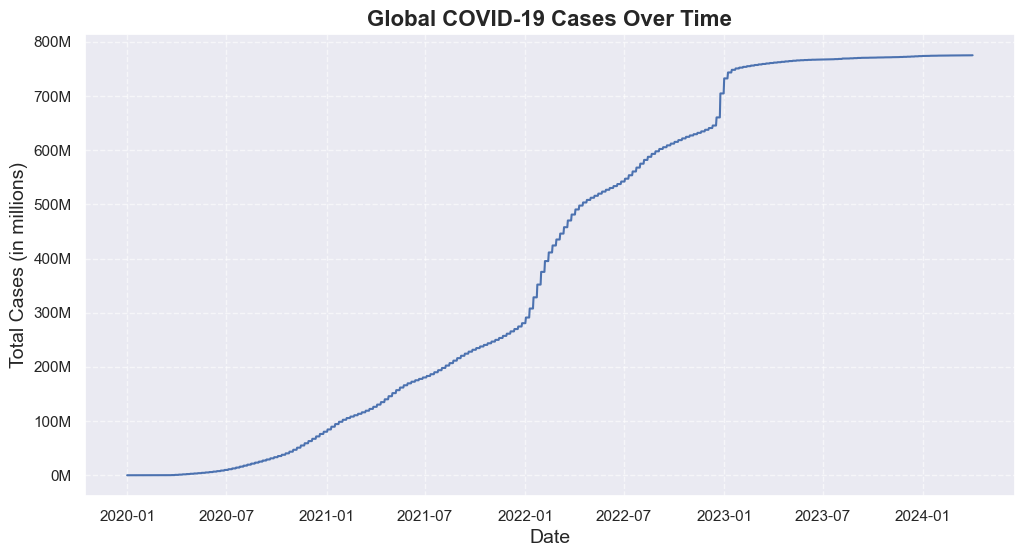

In [82]:
# Using groupby to create a dataframe that is to be used in the visualization of total cases over time
global_cases = covid_subset.groupby('date')['total_cases'].sum().reset_index()

# Plot the line graph
sns.set_theme(style = 'dark')
plt.figure(figsize=(12,6))
graph = sns.lineplot(x = 'date', y = 'total_cases', data = global_cases)

# Creating a custom formatter function
def millions_formatter(x, pos):
    # Formatting the number of cases to make it more readable in the graph
    return f'{x / 1e6:1.0f}M'

# Applying the custom formatter to the y-axis
formatter = ticker.FuncFormatter(millions_formatter)
graph.yaxis.set_major_formatter(formatter)

#Labeling the graph
plt.title("Global COVID-19 Cases Over Time", fontsize=16, fontweight = 'bold')
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Total Cases (in millions)", fontsize = 14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

From the above line plot, we can observe the gradual growth of the number of total cases in the world. There is a smooth growth from 2020 to 2022. Then, after 2022 there is a bit sharper increase in the total cases recorded till 2023. After that, in 2023 it reaches a plateau and smooths out and increases in a very low pace.

#### B. People vaccinated vs Total cases for top 5 Countries

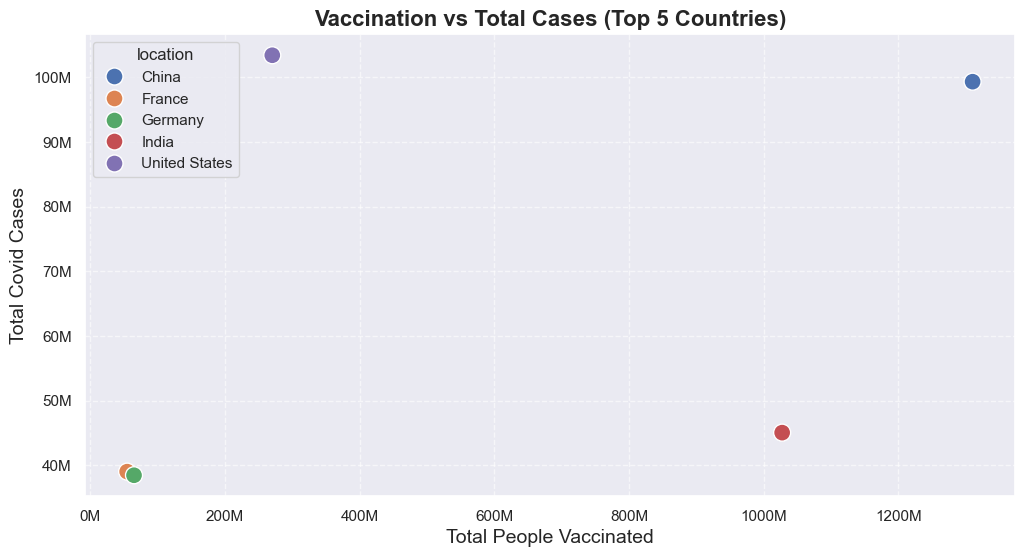

In [83]:
# Creating a dataframe for the top 5 countries with the most cases recorded
top5 = covid_subset.groupby('location')['total_cases'].max().nlargest(5).index
top5_cases = covid_subset[covid_subset['location'].isin(top5)]

# Storing the data in a new dataframe so that the latest entry of the countries are stored
latest_entry = top5_cases.groupby('location').last().reset_index()

# Plotting the scatter plot
sns.set_theme(style = 'dark')
fig, graph = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=latest_entry,x = 'people_vaccinated',y = 'total_cases',hue = 'location',s = 150)

# Defining a custom function to format the labels in millions to make it more readable in the graph
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

# Creating a formatter instance for the custom function
format_to_millions = ticker.FuncFormatter(millions_formatter)

# Apply the million formatter to both axes
graph.xaxis.set_major_formatter(format_to_millions)
graph.yaxis.set_major_formatter(format_to_millions)

# Labeling the graph
plt.title("Vaccination vs Total Cases (Top 5 Countries)", fontsize = 16, fontweight = 'bold')
plt.xlabel("Total People Vaccinated", fontsize = 14)
plt.ylabel("Total Covid Cases", fontsize = 14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


From the scatterplot above, we are able to see that US has the highest number of covid cases in total. While, China has had the highest number of people who are vaccinated. We can also observe India, where there are relatively fewer people with Covid cases compared to US and China but they still have managed to get more people vaccinated.

#### C. Heatmap for COVID-19 Cases By Continent over Time

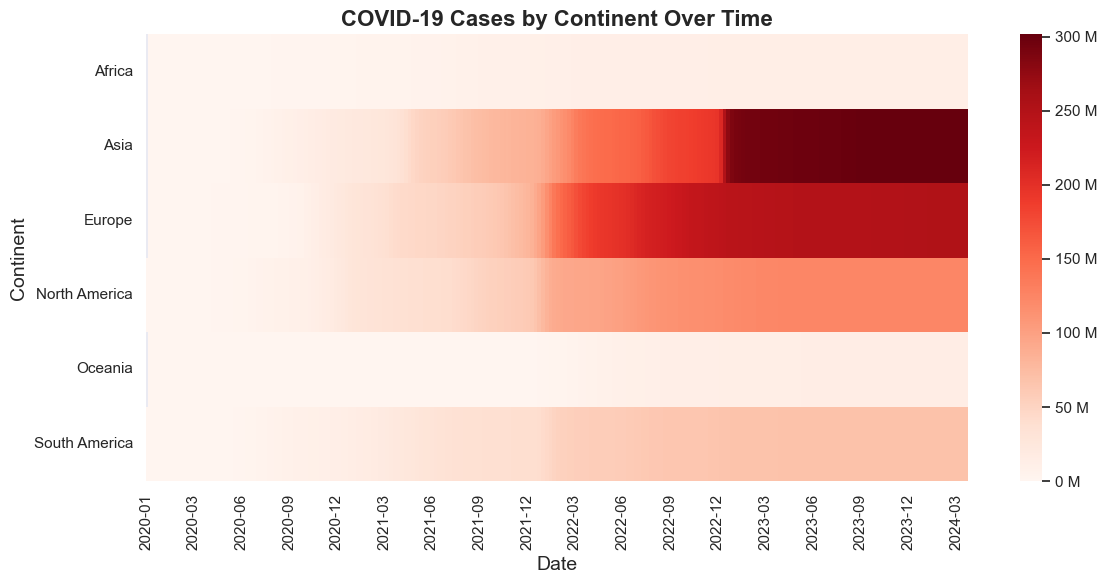

In [84]:
# Creating a dataframe by grouping the data by continent and date
heatmap = covid_subset.groupby(['continent', 'date'])['total_cases'].sum().reset_index()

# Converting it into a pivot to store continents, date, and total cases as rows, columns and cells respectively.
heatmap_pivot = heatmap.pivot(index='continent', columns='date', values='total_cases')

# Getting the full list of dates from the pivot table's columns
dates = heatmap_pivot.columns

# Calculating the interval for showing ticks in the interval of 90 days / 3 months.
step = 90 # 90 days
x_tick_locations = range(0, len(dates), step)
x_tick_labels = [d.strftime('%Y-%m') for d in dates[::step]]

# Plotting the heatmap graph
plt.figure(figsize=(12, 6))
graph = sns.heatmap(heatmap_pivot, cmap='Reds', cbar_kws={'format': '%.0f'})

# Formating the colorbar to show interval in millions.
colorbar = graph.collections[0].colorbar
colorbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f} M'))

# Apply the custom tick locations and labels to the plot's axis
graph.set_xticks(x_tick_locations)
graph.set_xticklabels(x_tick_labels, rotation=90)

plt.title("COVID-19 Cases by Continent Over Time", fontsize = 16, fontweight = 'bold')
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Continent", fontsize = 14)
plt.tight_layout()
plt.show()

In the heatmap above, it can be visualized that the Continent with the most covid cases is Asia. Right behind Asia are Europe and North America. It can also be seen that Covid had surged in the end of 2021 as there is a major increase in the Covid cases as we can observe in the heatmap.

#### D. Top 10 Countries with the Highest Deaths

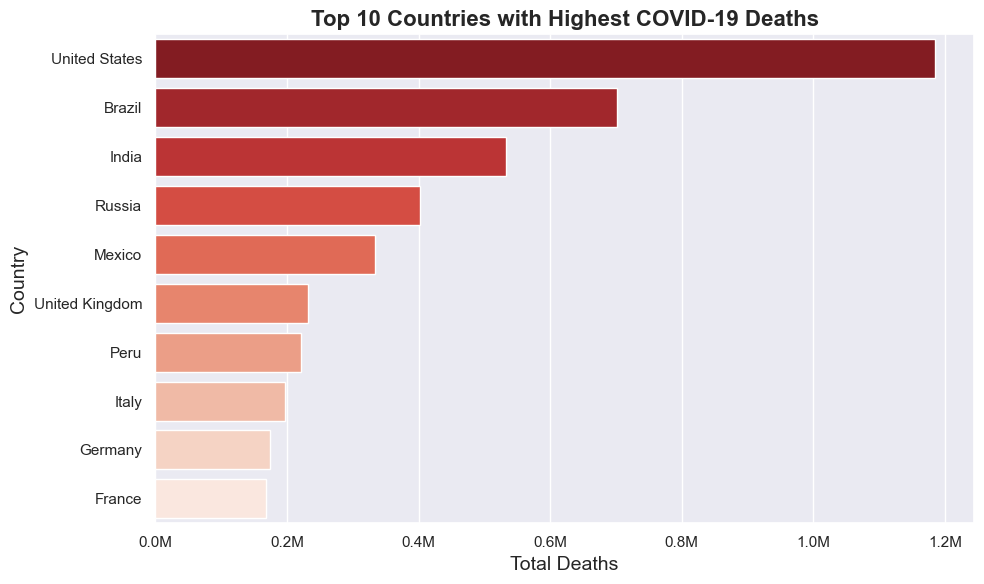

In [86]:
# Getting the latest date for each country as we need the latest data for the total deaths
latest_data = covid_subset.sort_values('date').groupby('location').tail(1)

# Sorting and picking the top 10 countries with highest total deaths
top10_deaths = latest_data.nlargest(10, 'total_deaths')[['location', 'total_deaths']]

# Plotting the bar chart
sns.set_theme(style="darkgrid")
fig, graph = plt.subplots(figsize=(10, 6))
sns.barplot(data=top10_deaths, x = 'total_deaths', y = 'location', hue = 'location', palette = 'Reds_r')

# Defining a new custom function to format the labels in millions to make it more readable in the graph
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

# Creating a formatter instance for the custom function
format_to_millions = ticker.FuncFormatter(millions_formatter)

# Apply the million formatter to both axes
graph.xaxis.set_major_formatter(format_to_millions)

# Labelling the graph
plt.title("Top 10 Countries with Highest COVID-19 Deaths", fontsize = 16, fontweight='bold')
plt.xlabel("Total Deaths", fontsize = 14)
plt.ylabel("Country", fontsize = 14)
plt.tight_layout()
plt.show()


From the above barplot, it can be seen that the countries with the highest number of deaths because of Covid are the US, Brazil and India respectively. It can also be observed that US has almost double the amount of people who have died in Brazil. We can also co-relate it to the low amount of vaccinations in the US being one of the major factors on why there are so many deaths caused by Covid.

### 4. Conclusion
- There was around 750,000 total cases recorded by the mid-point of 2024.
- The US had the highest amount of recorded Covid cases.
- China had the higesht amount of recorded people who had been vaccinated.
- The main surge of Covid cases happened in the start of 2022.
- The US had more than 1.1 million deaths because of Covid.